In [1]:
# import K-Means
from sklearn.cluster import KMeans

In [2]:
# import numpy and pandas
import pandas as pd
import numpy as np

In [3]:
# for visualization
from matplotlib import pyplot as plt
from matplotlib import cm

In [4]:
df = pd.read_csv("C:\Users\Armin\Desktop\College Doc Final1\BusinessProcess\Assignment2\wine.data.csv")

In [5]:
# no. of clusters
clusters = 3

In [6]:
km = KMeans(n_clusters=clusters, n_init=50, tol=1e-10, random_state=1234).fit(df)

In [7]:
# get centers
centers = km.cluster_centers_
print(centers)

[[1.02127660e+00 1.38044681e+01 1.88340426e+00 2.42617021e+00
  1.70234043e+01 1.05510638e+02 2.86723404e+00 3.01425532e+00
  2.85319149e-01 1.91042553e+00 5.70255319e+00 1.07829787e+00
  3.11404255e+00 1.19514894e+03]
 [2.27536232e+00 1.25166667e+01 2.49420290e+00 2.28855072e+00
  2.08231884e+01 9.23478261e+01 2.07072464e+00 1.75840580e+00
  3.90144928e-01 1.45188406e+00 4.08695651e+00 9.41159420e-01
  2.49072464e+00 4.58231884e+02]
 [2.25806452e+00 1.29298387e+01 2.50403226e+00 2.40806452e+00
  1.98903226e+01 1.03596774e+02 2.11112903e+00 1.58403226e+00
  3.88387097e-01 1.50338710e+00 5.65032258e+00 8.83967742e-01
  2.36548387e+00 7.28338710e+02]]


In [8]:
# get the labels/clusters
labels = km.predict(df)
print(labels)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


In [9]:
df['label'] = labels

groups = df.groupby('label')
print(groups.size)

<bound method DataFrameGroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000000000E345128>>


In [10]:
inertia = km.inertia_
print(inertia)

2370742.3045900567


In [11]:
print(df)

     class      a     b     c     d    e     f     g     h     i          j  \
0        1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.640000   
1        1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.380000   
2        1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.680000   
3        1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.800000   
4        1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.320000   
5        1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.750000   
6        1  14.39  1.87  2.45  14.6   96  2.50  2.52  0.30  1.98   5.250000   
7        1  14.06  2.15  2.61  17.6  121  2.60  2.51  0.31  1.25   5.050000   
8        1  14.83  1.64  2.17  14.0   97  2.80  2.98  0.29  1.98   5.200000   
9        1  13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85   7.220000   
10       1  14.10  2.16  2.30  18.0  105  2.95  3.32  0.22  2.38   5.750000   
11       1  14.12  1.48  2.32  16.8   95  2.20  2.43

<module 'matplotlib.pyplot' from 'C:\Users\Armin\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

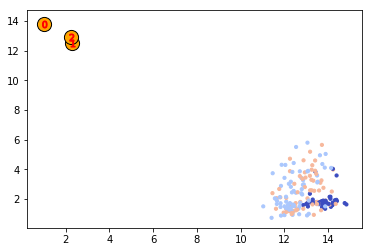

In [12]:
# colors
colors = cm.coolwarm(np.array(labels).astype(float)/clusters)

# graph figure
fig, ax = plt.subplots()

# plot data to graph figure
ax.scatter(df['a'], df['b'], marker='o', s=10, c=colors)

# attach centers to graph
ax.scatter(centers[:,0], centers[:,1], s=200, c='orange', edgecolor='k')
for i,c in enumerate(centers):
    ax.scatter(c[0], c[1], marker='$%d$'%i, c='red', s=50)
    
plt

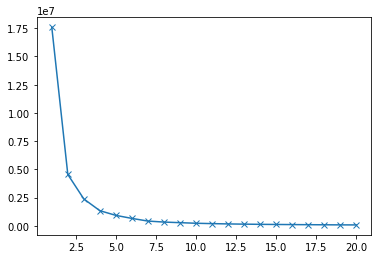

In [13]:
inertias = []

# loop to get inertia where k = 1 to 20
for i in range(1, 21) :
    km = KMeans(n_clusters=i, n_init=50, tol=1e-10, random_state=1234).fit(df)
    inertias.append(km.inertia_)
    
# graph all inertias with respect to k
fig2, ax2 = plt.subplots()
ax2.plot(range(1,21), inertias, 'x-')

plt.show()

In [14]:
from sklearn.metrics import silhouette_score

scores = []
for i in range(2, 8):
    km = KMeans(n_clusters=i, n_init=50, tol=1e-10, random_state=1234).fit_predict(df)
    sc = silhouette_score(df, km)
    print("For k = %d, the score is %g"%(i, sc))
    scores.append(sc)
    
print("k =", scores.index(max(scores)) + 2, "since", round(max(scores), 4) , "is the closest score to 1")
    

For k = 2, the score is 0.656848
For k = 3, the score is 0.57113
For k = 4, the score is 0.562014
For k = 5, the score is 0.548971
For k = 6, the score is 0.565613
For k = 7, the score is 0.561592
('k =', 2, 'since', 0.6568, 'is the closest score to 1')
